<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/stock_chart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 735 kB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import numpy as np
import pandas as pd  
import pandas_datareader as pdr
import yfinance as yf

import scipy as sp
from scipy.stats import norm

from pylab import plt, mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#plt.style.use('seaborn')
plt.style.use('fivethirtyeight')
mpl.rcParams['font.family'] = 'DejaVu Sans'
%matplotlib inline

pd.set_option('precision', 3)
pd.set_option('display.max_colwidth', 100)

In [4]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [5]:
tic=['SPY', 'IEF', 'TLT','TSLA', 'AAPL', 'NVDA', 'BAC']
prices= get_prices(tic, freq_p='1d', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                SPY      IEF      TLT     TSLA     AAPL     NVDA     BAC
Date                                                                    
2011-01-03  101.991   76.004   70.107    5.324   10.064    3.632  12.091
2011-01-04  101.935   76.183   70.189    5.334   10.116    3.620  12.134
2011-01-05  102.464   75.362   68.643    5.366   10.199    3.898  12.355
2011-01-06  102.264   75.752   68.943    5.576   10.191    4.437  12.304
2011-01-07  102.063   76.256   69.311    5.648   10.264    4.561  12.142
...   

,SPY,IEF,TLT,TSLA,AAPL,NVDA,BAC
Date,,,,,,,
2022-05-02,412.697,101.639,116.741,902.94,157.728,195.289,35.933
2022-05-03,414.589,101.758,117.528,909.25,159.246,195.979,36.917
2022-05-04,427.215,102.416,118.175,952.62,165.776,203.297,38.399
2022-05-05,412.030,101.389,114.938,873.28,156.540,188.400,37.325
2022-05-06,409.571,100.811,113.244,865.65,157.280,186.711,37.236
2022-05-09,396.457,101.559,114.240,787.11,152.060,169.464,36.162
2022-05-10,397.373,101.898,115.276,800.04,154.510,175.913,35.555
2022-05-11,391.061,102.526,117.498,734.00,146.500,166.265,35.366
2022-05-12,390.652,102.865,117.279,728.00,142.560,161.716,34.869


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2011-01-03 to 2022-05-27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2871 non-null   float64
 1   IEF     2871 non-null   float64
 2   TLT     2871 non-null   float64
 3   TSLA    2871 non-null   float64
 4   AAPL    2871 non-null   float64
 5   NVDA    2871 non-null   float64
 6   BAC     2871 non-null   float64
dtypes: float64(7)
memory usage: 179.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d2a15350>,
      dtype=object)

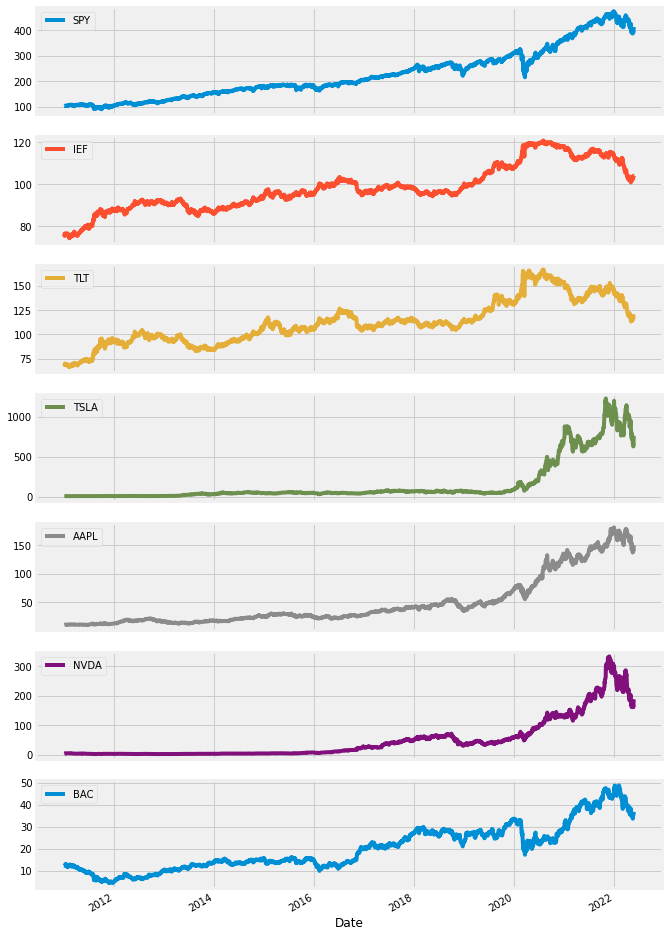

In [7]:
prices.plot(figsize=(10, 18), subplots=True)


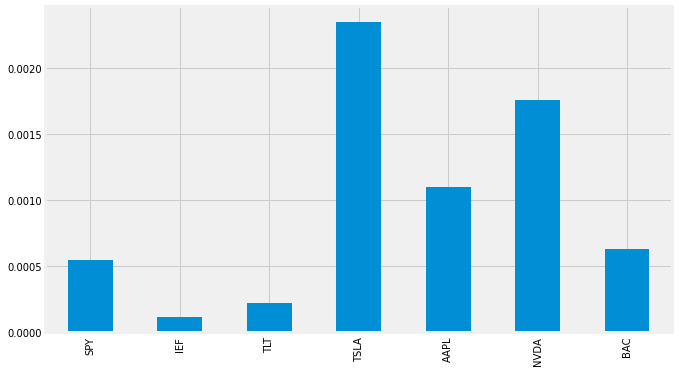

In [8]:
prices.pct_change().mean().plot(kind='bar', figsize=(10, 6));  

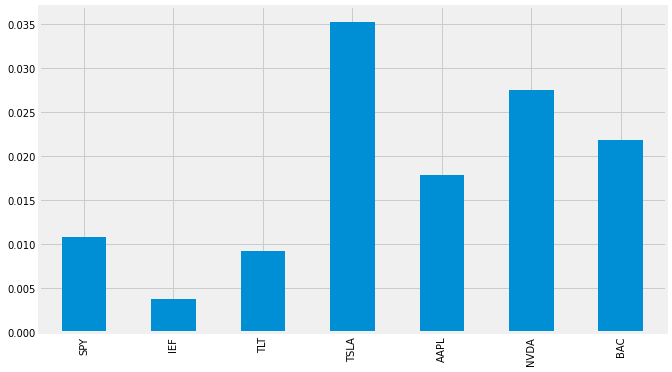

In [9]:
prices.pct_change().std().plot(kind='bar', figsize=(10, 6));  

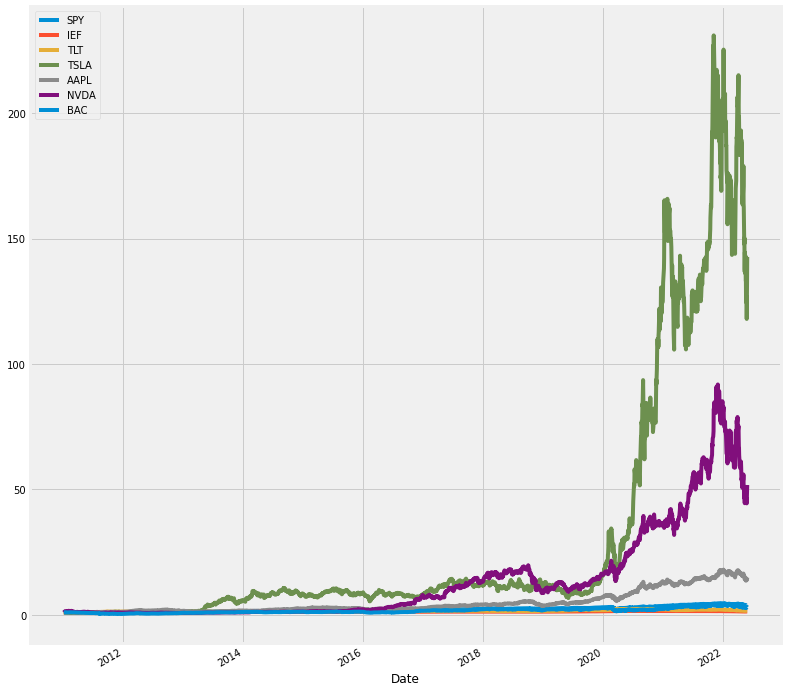

In [10]:
rets = np.log(prices / prices.shift(1))  
rets.cumsum().apply(np.exp).plot(figsize=(12, 13))  

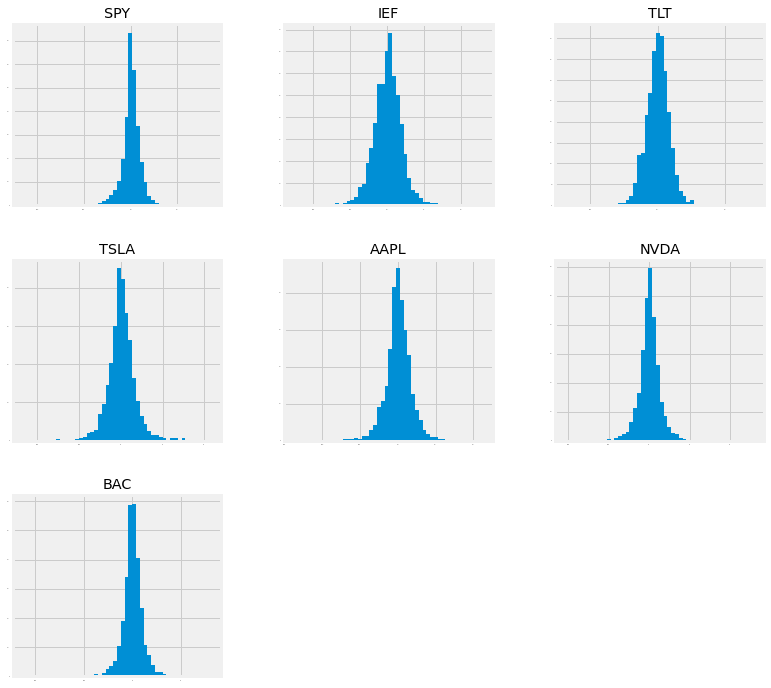

In [11]:
rets.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

The above histogram shows the distribution for each series individually. Next, lets look at the density distribution over the same x axis scale.

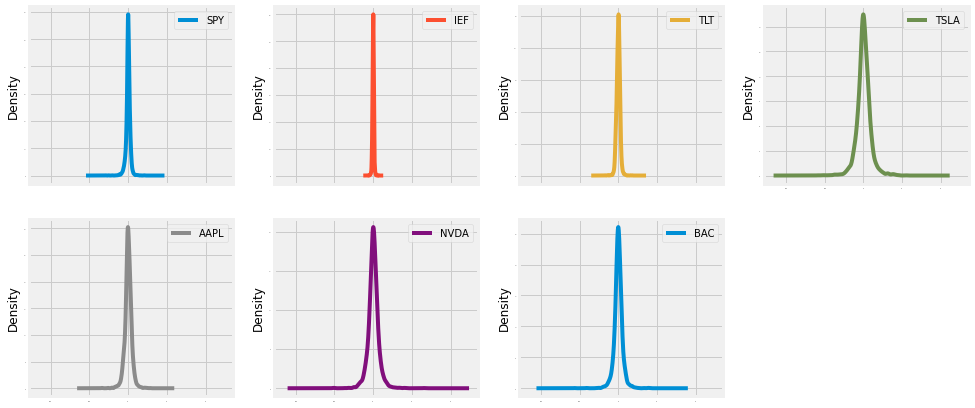

In [12]:
rets.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

We can see that the vix has a much larger variance compared to the other distributions.

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix

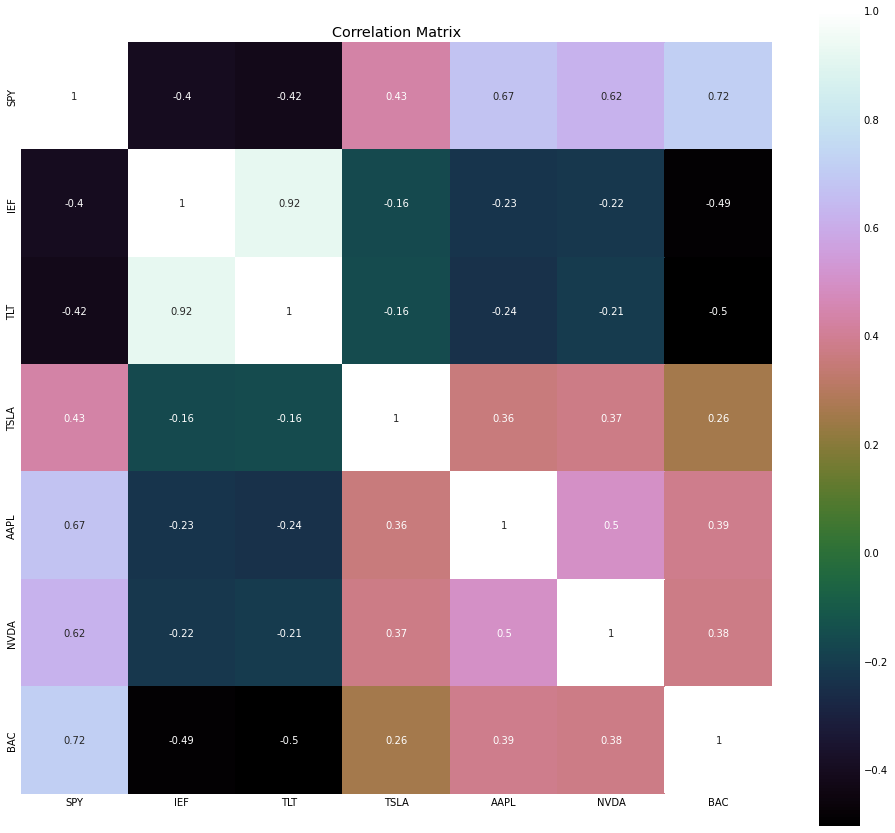

In [14]:
correlation = rets.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation plot above, we see some correlation of the predicted vari‐
able with the lagged 5 days, 15days, 30 days and 60 days return of MSFT. 

<Figure size 1080x1080 with 0 Axes>

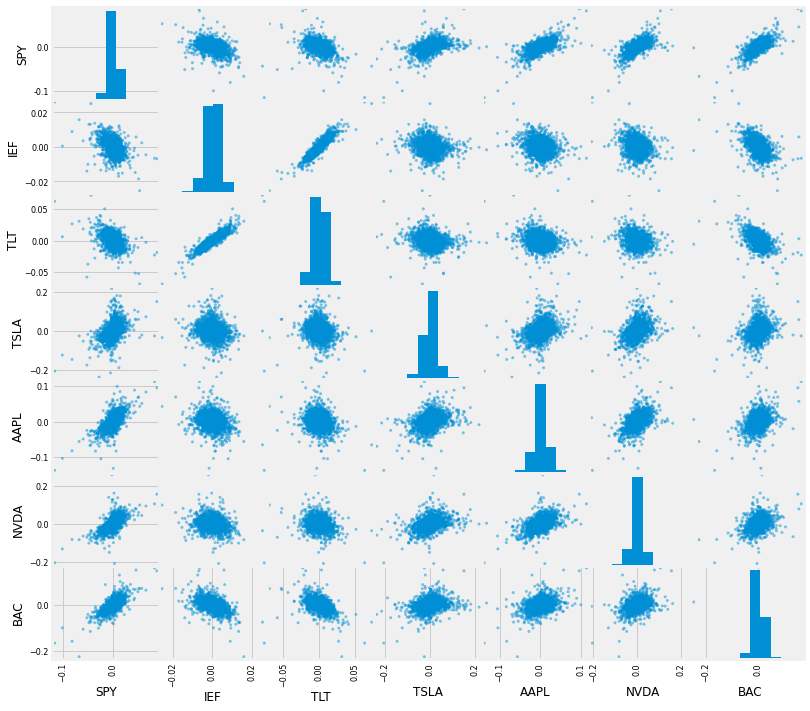

In [15]:
plt.figure(figsize=(15,15))
scatter_matrix(rets,figsize=(12,12))
plt.show()

In [16]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


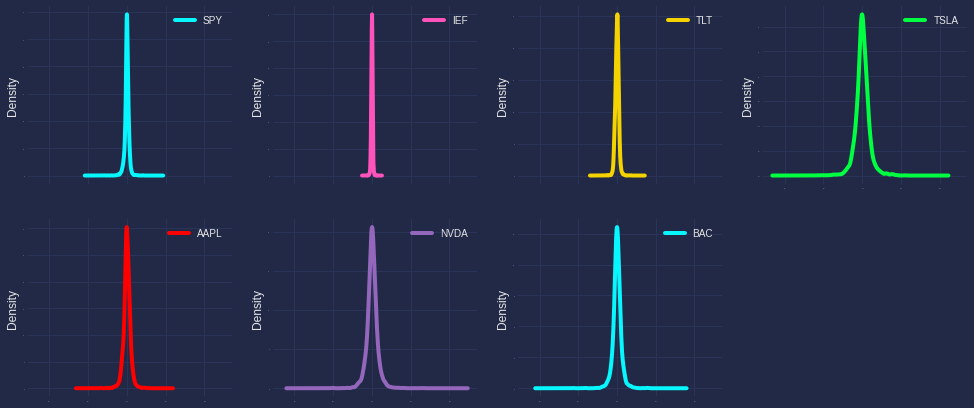

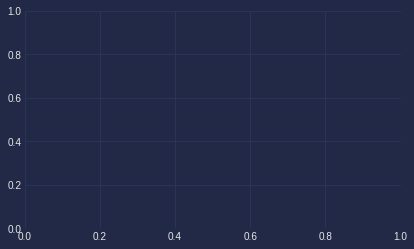

In [17]:
import mplcyberpunk
plt.style.use("cyberpunk")

rets.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()
mplcyberpunk.add_glow_effects()

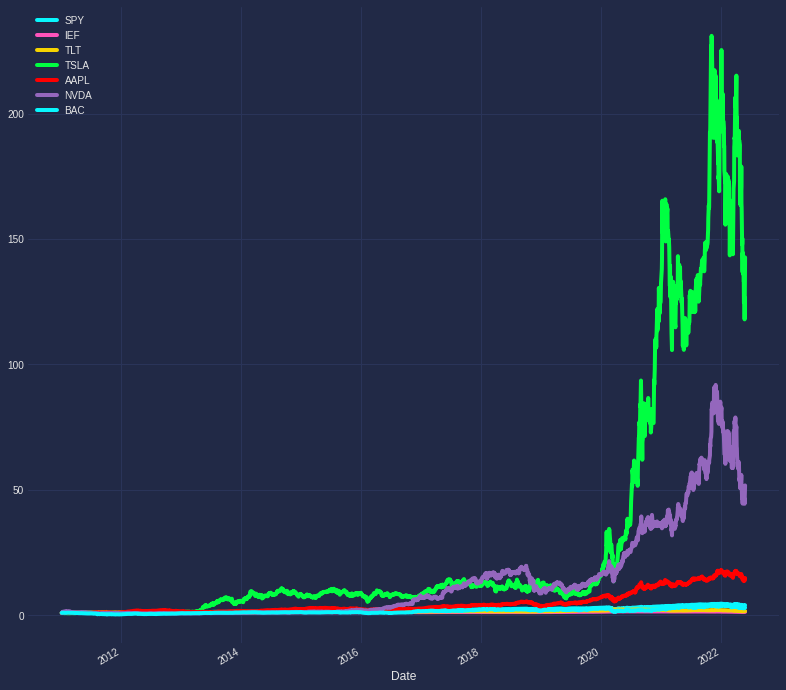

In [18]:
rets = np.log(prices / prices.shift(1))  
rets.cumsum().apply(np.exp).plot(figsize=(12, 13))  